In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 44.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from google.colab import drive
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
os.environ['DGLBACKEND'] = 'pytorch'
import dgl
import time
from dgl.data import DGLDataset
import networkx as nx
import math
import sys
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Test Code

In [ ]:
google_drive_id = '11qseLSBNM2v8etLEQv9-oX0jaD52_R0-'
students_test = pd.read_csv('https://drive.google.com/u/0/uc?id='+google_drive_id+'&export=download&confirm=t', sep="\t", header=None)

In [ ]:
students_test

,0,1,2,3
0,0.0,1.0,11.238837,3.746959
1,0.0,2.0,11.428255,3.221907
2,0.0,3.0,11.470348,2.720722
3,0.0,4.0,13.659186,1.360361
4,0.0,5.0,11.701860,1.312629
...,...,...,...,...
18348,3540.0,396.0,3.848986,9.999846
18349,3540.0,399.0,3.931067,11.485026
18350,3540.0,408.0,15.083824,6.974355
18351,3540.0,414.0,11.048576,7.921119


In [ ]:
np_test = students_test.to_numpy()
np_test

array([[0.00000000e+00, 1.00000000e+00, 1.12388369e+01, 3.74695886e+00],
       [0.00000000e+00, 2.00000000e+00, 1.14282555e+01, 3.22190730e+00],
       [0.00000000e+00, 3.00000000e+00, 1.14703485e+01, 2.72072172e+00],
       ...,
       [3.54000000e+03, 4.08000000e+02, 1.50838239e+01, 6.97435533e+00],
       [3.54000000e+03, 4.14000000e+02, 1.10485764e+01, 7.92111875e+00],
       [3.54000000e+03, 4.15000000e+02, 1.15431694e+01, 1.00678637e+01]])

In [ ]:
np_test.shape

(18353, 4)

In [ ]:
np_test[:, 0]

array([   0.,    0.,    0., ..., 3540., 3540., 3540.])

In [ ]:
frames = np.unique(np_test[:, 0]).tolist()

In [ ]:
len(frames)

355

In [ ]:
frames

In [ ]:
frame_data = []
for frame in frames:
    frame_data.append(np_test[frame == np_test[:, 0], :])

In [ ]:
frame_data[2][0]

array([20.        ,  1.        , 10.33467874,  3.60543359])

#Datasets


All Datasets are uploaded in google drive [here](https://drive.google.com/drive/folders/1IIeJtatO4FwagxdX-Z6lL4GjxiDLpSzo?usp=drive_link)

Collection of Trajectory Datasets can be found on  [github crowdbotp/OpenTraj](https://github.com/crowdbotp/OpenTraj)

##UCY  Dataset
Introduced by Alon Lerner et al. in [Crowds by Example](https://onlinelibrary.wiley.com/doi/10.1111/j.1467-8659.2007.01089.x)

dataset [here](https://)

info: The UCY dataset consist of real pedestrian trajectories with rich multi-human interaction scenarios captured at 2.5 Hz (Δt=0.4s). It is composed of three sequences (Zara01, Zara02, and UCY), taken in public spaces from top-view.

Students

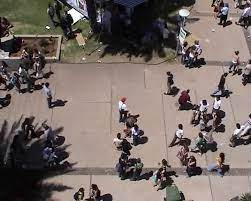

In [ ]:
google_drive_id = '11qseLSBNM2v8etLEQv9-oX0jaD52_R0-'
students_test = pd.read_csv('https://drive.google.com/u/0/uc?id='+google_drive_id+'&export=download&confirm=t', sep="\t", header=None)

In [ ]:
columns = []

In [ ]:
students_test

,0,1,2,3
0,0.0,1.0,11.238837,3.746959
1,0.0,2.0,11.428255,3.221907
2,0.0,3.0,11.470348,2.720722
3,0.0,4.0,13.659186,1.360361
4,0.0,5.0,11.701860,1.312629
...,...,...,...,...
18348,3540.0,396.0,3.848986,9.999846
18349,3540.0,399.0,3.931067,11.485026
18350,3540.0,408.0,15.083824,6.974355
18351,3540.0,414.0,11.048576,7.921119


## ETH BIWI Walking Pedestrians dataset Dataset
Introduced by  [ You'll Never Walk Alone: Modeling Social Behavior for Multi-​target Tracking](https://ieeexplore.ieee.org/document/5459260)

dataset [here](https://icu.ee.ethz.ch/research/datsets.html)

info: ETH is a dataset for pedestrian detection.

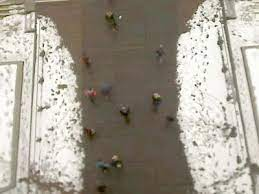

In [ ]:
google_drive_id = '1zatXDK-xuggEneqfXe3dG6rqugEH41Kl'
eth_test = pd.read_csv('https://drive.google.com/u/0/uc?id='+google_drive_id+'&export=download&confirm=t', sep="\t", header=None)

In [ ]:
eth_test

,0,1,2,3
0,780,1.0,8.46,3.59
1,790,1.0,9.57,3.79
2,800,1.0,10.67,3.99
3,800,2.0,13.64,5.80
4,810,1.0,11.73,4.32
...,...,...,...,...
5487,12380,358.0,10.35,6.75
5488,12380,364.0,12.29,4.14
5489,12380,365.0,12.65,5.35
5490,12380,366.0,12.08,7.02


#EDA


##Social-STGCNN
Code Example in [abduallahmohamed/Social-STGCNN](https://github.com/abduallahmohamed/Social-STGCNN)

###Utils

In [ ]:
import os
import math
import sys

import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as Func
from torch.nn import init
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module

import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from numpy import linalg as LA
import networkx as nx
from tqdm import tqdm
import time


def anorm(p1,p2):
    NORM = math.sqrt((p1[0]-p2[0])**2+ (p1[1]-p2[1])**2)
    if NORM ==0:
        return 0
    return 1/(NORM)

def seq_to_graph(seq_,seq_rel,norm_lap_matr = True):
    seq_ = seq_.squeeze()
    seq_rel = seq_rel.squeeze()
    seq_len = seq_.shape[2]
    max_nodes = seq_.shape[0]


    V = np.zeros((seq_len,max_nodes,2))
    A = np.zeros((seq_len,max_nodes,max_nodes))
    for s in range(seq_len):
        step_ = seq_[:,:,s]
        step_rel = seq_rel[:,:,s]
        for h in range(len(step_)):
            V[s,h,:] = step_rel[h]
            A[s,h,h] = 1
            for k in range(h+1,len(step_)):
                l2_norm = anorm(step_rel[h],step_rel[k])
                A[s,h,k] = l2_norm
                A[s,k,h] = l2_norm
        if norm_lap_matr:
            G = nx.from_numpy_array(A[s,:,:])
            A[s,:,:] = nx.normalized_laplacian_matrix(G).toarray()

    return torch.from_numpy(V).type(torch.float),\
           torch.from_numpy(A).type(torch.float)


def poly_fit(traj, traj_len, threshold):
    """
    Input:
    - traj: Numpy array of shape (2, traj_len)
    - traj_len: Len of trajectory
    - threshold: Minimum error to be considered for non linear traj
    Output:
    - int: 1 -> Non Linear 0-> Linear
    """
    t = np.linspace(0, traj_len - 1, traj_len)
    res_x = np.polyfit(t, traj[0, -traj_len:], 2, full=True)[1]
    res_y = np.polyfit(t, traj[1, -traj_len:], 2, full=True)[1]
    if res_x + res_y >= threshold:
        return 1.0
    else:
        return 0.0
def read_file(_path, delim='\t'):
    data = []
    if delim == 'tab':
        delim = '\t'
    elif delim == 'space':
        delim = ' '
    with open(_path, 'r') as f:
        for line in f:
            line = line.strip().split(delim)
            line = [float(i) for i in line]
            data.append(line)
    return np.asarray(data)


class TrajectoryDataset(Dataset):
    """Dataloder for the Trajectory datasets"""
    def __init__(
        self, data_dir, obs_len=8, pred_len=8, skip=1, threshold=0.002,
        min_ped=1, delim='\t',norm_lap_matr = True):
        """
        Args:
        - data_dir: Directory containing dataset files in the format
        <frame_id> <ped_id> <x> <y>
        - obs_len: Number of time-steps in input trajectories
        - pred_len: Number of time-steps in output trajectories
        - skip: Number of frames to skip while making the dataset
        - threshold: Minimum error to be considered for non linear traj
        when using a linear predictor
        - min_ped: Minimum number of pedestrians that should be in a seqeunce
        - delim: Delimiter in the dataset files
        """
        super(TrajectoryDataset, self).__init__()

        self.max_peds_in_frame = 0
        self.data_dir = data_dir
        self.obs_len = obs_len
        self.pred_len = pred_len
        self.skip = skip
        self.seq_len = self.obs_len + self.pred_len
        self.delim = delim
        self.norm_lap_matr = norm_lap_matr

        all_files = os.listdir(self.data_dir)
        all_files = [os.path.join(self.data_dir, _path) for _path in all_files]
        num_peds_in_seq = []
        seq_list = []
        seq_list_rel = []
        loss_mask_list = []
        non_linear_ped = []
        for path in all_files:
            data = read_file(path, delim)
            frames = np.unique(data[:, 0]).tolist()
            frame_data = []
            for frame in frames:
                frame_data.append(data[frame == data[:, 0], :])
            num_sequences = int(
                math.ceil((len(frames) - self.seq_len + 1) / skip))

            for idx in range(0, num_sequences * self.skip + 1, skip):
                curr_seq_data = np.concatenate(
                    frame_data[idx:idx + self.seq_len], axis=0)
                peds_in_curr_seq = np.unique(curr_seq_data[:, 1])
                self.max_peds_in_frame = max(self.max_peds_in_frame,len(peds_in_curr_seq))
                curr_seq_rel = np.zeros((len(peds_in_curr_seq), 2,
                                         self.seq_len))
                curr_seq = np.zeros((len(peds_in_curr_seq), 2, self.seq_len))
                curr_loss_mask = np.zeros((len(peds_in_curr_seq),
                                           self.seq_len))
                num_peds_considered = 0
                _non_linear_ped = []
                for _, ped_id in enumerate(peds_in_curr_seq):
                    curr_ped_seq = curr_seq_data[curr_seq_data[:, 1] ==
                                                 ped_id, :]
                    curr_ped_seq = np.around(curr_ped_seq, decimals=4)
                    pad_front = frames.index(curr_ped_seq[0, 0]) - idx
                    pad_end = frames.index(curr_ped_seq[-1, 0]) - idx + 1
                    if pad_end - pad_front != self.seq_len:
                        continue
                    curr_ped_seq = np.transpose(curr_ped_seq[:, 2:])
                    curr_ped_seq = curr_ped_seq
                    # Make coordinates relative
                    rel_curr_ped_seq = np.zeros(curr_ped_seq.shape)
                    rel_curr_ped_seq[:, 1:] = \
                        curr_ped_seq[:, 1:] - curr_ped_seq[:, :-1]
                    _idx = num_peds_considered
                    curr_seq[_idx, :, pad_front:pad_end] = curr_ped_seq
                    curr_seq_rel[_idx, :, pad_front:pad_end] = rel_curr_ped_seq
                    # Linear vs Non-Linear Trajectory
                    _non_linear_ped.append(
                        poly_fit(curr_ped_seq, pred_len, threshold))
                    curr_loss_mask[_idx, pad_front:pad_end] = 1
                    num_peds_considered += 1

                if num_peds_considered > min_ped:
                    non_linear_ped += _non_linear_ped
                    num_peds_in_seq.append(num_peds_considered)
                    loss_mask_list.append(curr_loss_mask[:num_peds_considered])
                    seq_list.append(curr_seq[:num_peds_considered])
                    seq_list_rel.append(curr_seq_rel[:num_peds_considered])

        self.num_seq = len(seq_list)
        seq_list = np.concatenate(seq_list, axis=0)
        seq_list_rel = np.concatenate(seq_list_rel, axis=0)
        loss_mask_list = np.concatenate(loss_mask_list, axis=0)
        non_linear_ped = np.asarray(non_linear_ped)

        # Convert numpy -> Torch Tensor
        self.obs_traj = torch.from_numpy(
            seq_list[:, :, :self.obs_len]).type(torch.float)
        self.pred_traj = torch.from_numpy(
            seq_list[:, :, self.obs_len:]).type(torch.float)
        self.obs_traj_rel = torch.from_numpy(
            seq_list_rel[:, :, :self.obs_len]).type(torch.float)
        self.pred_traj_rel = torch.from_numpy(
            seq_list_rel[:, :, self.obs_len:]).type(torch.float)
        self.loss_mask = torch.from_numpy(loss_mask_list).type(torch.float)
        self.non_linear_ped = torch.from_numpy(non_linear_ped).type(torch.float)
        cum_start_idx = [0] + np.cumsum(num_peds_in_seq).tolist()
        self.seq_start_end = [
            (start, end)
            for start, end in zip(cum_start_idx, cum_start_idx[1:])
        ]
        #Convert to Graphs
        self.v_obs = []
        self.A_obs = []
        self.v_pred = []
        self.A_pred = []
        print("Processing Data .....")
        pbar = tqdm(total=len(self.seq_start_end))
        for ss in range(len(self.seq_start_end)):
            pbar.update(1)

            start, end = self.seq_start_end[ss]

            v_,a_ = seq_to_graph(self.obs_traj[start:end,:],self.obs_traj_rel[start:end, :],self.norm_lap_matr)
            self.v_obs.append(v_.clone())
            self.A_obs.append(a_.clone())
            v_,a_=seq_to_graph(self.pred_traj[start:end,:],self.pred_traj_rel[start:end, :],self.norm_lap_matr)
            self.v_pred.append(v_.clone())
            self.A_pred.append(a_.clone())
        pbar.close()

    def __len__(self):
        return self.num_seq

    def __getitem__(self, index):
        start, end = self.seq_start_end[index]

        out = [
            self.obs_traj[start:end, :], self.pred_traj[start:end, :],
            self.obs_traj_rel[start:end, :], self.pred_traj_rel[start:end, :],
            self.non_linear_ped[start:end], self.loss_mask[start:end, :],
            self.v_obs[index], self.A_obs[index],
            self.v_pred[index], self.A_pred[index]

        ]
        return out

In [ ]:
"/content/drive/MyDrive/datasets/trajectory/UCY_ETH_data_parsed"

In [ ]:
a=5
b=8


In [ ]:
a = \
    a - b

In [ ]:
a

-3

In [ ]:
#TRAIN

print('*'*30)
print("Training initiating....")



def graph_loss(V_pred,V_target):
    return bivariate_loss(V_pred,V_target)

#Data prep
obs_seq_len = 8
pred_seq_len = 12
data_set = '/content/drive/MyDrive/datasets/trajectory/UCY_ETH_data_parsed'+'/eth'+'/'

dset_train = TrajectoryDataset(
        data_set+'train/',
        obs_len=obs_seq_len,
        pred_len=pred_seq_len,
        skip=1,norm_lap_matr=True)


In [ ]:
name = [ "Manjeet", "Nikhil", "Shambhavi", "Astha" ]
roll_no = [ 4, 1, 3, 2 ]

# using zip() to map values
mapped = zip(name, roll_no)

print(set(mapped))

{('Astha', 2), ('Nikhil', 1), ('Manjeet', 4), ('Shambhavi', 3)}


In [ ]:
dset_train[0][5].shape

torch.Size([2, 20])

In [ ]:

self.obs_traj[start:end, :],
self.pred_traj[start:end, :],
self.obs_traj_rel[start:end, :],
self.pred_traj_rel[start:end, :],
self.non_linear_ped[start:end],
self.loss_mask[start:end, :],
self.v_obs[index],
self.A_obs[index],
self.v_pred[index],
self.A_pred[index]



In [ ]:
for idx in range(10):
    print(dset_train[1500][idx].shape)

torch.Size([6, 2, 8])
torch.Size([6, 2, 12])
torch.Size([6, 2, 8])
torch.Size([6, 2, 12])
torch.Size([6])
torch.Size([6, 20])
torch.Size([8, 6, 2])
torch.Size([8, 6, 6])
torch.Size([12, 6, 2])
torch.Size([12, 6, 6])


In [ ]:
for g in dset_train:
    print(g[0].shape)



torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([3, 2, 8])
torch.Size([3, 2, 8])
torch.Size([3, 2, 8])
torch.Size([3, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([4, 2, 8])
torch.Size([4, 2, 8])
torch.Size([3, 2, 8])
torch.Size([3, 2, 8])
torch.Size([3, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([2, 2, 8])
torch.Size([4, 2, 8])
torch.Size([4, 2, 8])
torch.Size([4, 2, 8])
torch.Size([4, 2, 8])
torch.Size([4, 2, 8])
torch.Size([4, 2, 8])
torch.Size([5, 2, 8])
torch.Size([5, 2, 8])
torch.Size([5, 2, 8])
torch.Size([5, 2, 8])
torch.Size([5, 2, 8])
torch.Size([5, 2, 8])
torch.Size([5, 2, 8])
torch.Size([5, 2, 8])
torch.Size([5, 2, 8])
torch.Size([4, 2, 8])
torch.Size

###Model

In [ ]:
import os
import math
import sys

import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as Func
from torch.nn import init
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module

import torch.optim as optim




class ConvTemporalGraphical(nn.Module):
    #Source : https://github.com/yysijie/st-gcn/blob/master/net/st_gcn.py
    r"""The basic module for applying a graph convolution.
    Args:
        in_channels (int): Number of channels in the input sequence data
        out_channels (int): Number of channels produced by the convolution
        kernel_size (int): Size of the graph convolving kernel
        t_kernel_size (int): Size of the temporal convolving kernel
        t_stride (int, optional): Stride of the temporal convolution. Default: 1
        t_padding (int, optional): Temporal zero-padding added to both sides of
            the input. Default: 0
        t_dilation (int, optional): Spacing between temporal kernel elements.
            Default: 1
        bias (bool, optional): If ``True``, adds a learnable bias to the output.
            Default: ``True``
    Shape:
        - Input[0]: Input graph sequence in :math:`(N, in_channels, T_{in}, V)` format
        - Input[1]: Input graph adjacency matrix in :math:`(K, V, V)` format
        - Output[0]: Outpu graph sequence in :math:`(N, out_channels, T_{out}, V)` format
        - Output[1]: Graph adjacency matrix for output data in :math:`(K, V, V)` format
        where
            :math:`N` is a batch size,
            :math:`K` is the spatial kernel size, as :math:`K == kernel_size[1]`,
            :math:`T_{in}/T_{out}` is a length of input/output sequence,
            :math:`V` is the number of graph nodes.
    """
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 t_kernel_size=1,
                 t_stride=1,
                 t_padding=0,
                 t_dilation=1,
                 bias=True):
        super(ConvTemporalGraphical,self).__init__()
        self.kernel_size = kernel_size
        self.conv = nn.Conv2d(
            in_channels,
            out_channels,
            kernel_size=(t_kernel_size, 1),
            padding=(t_padding, 0),
            stride=(t_stride, 1),
            dilation=(t_dilation, 1),
            bias=bias)

    def forward(self, x, A):
        assert A.size(0) == self.kernel_size
        x = self.conv(x)
        x = torch.einsum('nctv,tvw->nctw', (x, A))
        return x.contiguous(), A


class st_gcn(nn.Module):
    r"""Applies a spatial temporal graph convolution over an input graph sequence.
    Args:
        in_channels (int): Number of channels in the input sequence data
        out_channels (int): Number of channels produced by the convolution
        kernel_size (tuple): Size of the temporal convolving kernel and graph convolving kernel
        stride (int, optional): Stride of the temporal convolution. Default: 1
        dropout (int, optional): Dropout rate of the final output. Default: 0
        residual (bool, optional): If ``True``, applies a residual mechanism. Default: ``True``
    Shape:
        - Input[0]: Input graph sequence in :math:`(N, in_channels, T_{in}, V)` format
        - Input[1]: Input graph adjacency matrix in :math:`(K, V, V)` format
        - Output[0]: Outpu graph sequence in :math:`(N, out_channels, T_{out}, V)` format
        - Output[1]: Graph adjacency matrix for output data in :math:`(K, V, V)` format
        where
            :math:`N` is a batch size,
            :math:`K` is the spatial kernel size, as :math:`K == kernel_size[1]`,
            :math:`T_{in}/T_{out}` is a length of input/output sequence,
            :math:`V` is the number of graph nodes.
    """

    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 use_mdn = False,
                 stride=1,
                 dropout=0,
                 residual=True):
        super(st_gcn,self).__init__()

#         print("outstg",out_channels)

        assert len(kernel_size) == 2
        assert kernel_size[0] % 2 == 1
        padding = ((kernel_size[0] - 1) // 2, 0)
        self.use_mdn = use_mdn

        self.gcn = ConvTemporalGraphical(in_channels, out_channels,
                                         kernel_size[1])


        self.tcn = nn.Sequential(
            nn.BatchNorm2d(out_channels),
            nn.PReLU(),
            nn.Conv2d(
                out_channels,
                out_channels,
                (kernel_size[0], 1),
                (stride, 1),
                padding,
            ),
            nn.BatchNorm2d(out_channels),
            nn.Dropout(dropout, inplace=True),
        )

        if not residual:
            self.residual = lambda x: 0

        elif (in_channels == out_channels) and (stride == 1):
            self.residual = lambda x: x

        else:
            self.residual = nn.Sequential(
                nn.Conv2d(
                    in_channels,
                    out_channels,
                    kernel_size=1,
                    stride=(stride, 1)),
                nn.BatchNorm2d(out_channels),
            )

        self.prelu = nn.PReLU()

    def forward(self, x, A):

        res = self.residual(x)
        x, A = self.gcn(x, A)

        x = self.tcn(x) + res

        if not self.use_mdn:
            x = self.prelu(x)

        return x, A

class social_stgcnn(nn.Module):
    def __init__(self,n_stgcnn =1,n_txpcnn=1,input_feat=2,output_feat=5,
                 seq_len=8,pred_seq_len=12,kernel_size=3):
        super(social_stgcnn,self).__init__()
        self.n_stgcnn= n_stgcnn
        self.n_txpcnn = n_txpcnn

        self.st_gcns = nn.ModuleList()
        self.st_gcns.append(st_gcn(input_feat,output_feat,(kernel_size,seq_len)))
        for j in range(1,self.n_stgcnn):
            self.st_gcns.append(st_gcn(output_feat,output_feat,(kernel_size,seq_len)))

        self.tpcnns = nn.ModuleList()
        self.tpcnns.append(nn.Conv2d(seq_len,pred_seq_len,3,padding=1))
        for j in range(1,self.n_txpcnn):
            self.tpcnns.append(nn.Conv2d(pred_seq_len,pred_seq_len,3,padding=1))
        self.tpcnn_ouput = nn.Conv2d(pred_seq_len,pred_seq_len,3,padding=1)


        self.prelus = nn.ModuleList()
        for j in range(self.n_txpcnn):
            self.prelus.append(nn.PReLU())



    def forward(self,v,a):

        for k in range(self.n_stgcnn):
            v,a = self.st_gcns[k](v,a)

        v = v.view(v.shape[0],v.shape[2],v.shape[1],v.shape[3])

        v = self.prelus[0](self.tpcnns[0](v))

        for k in range(1,self.n_txpcnn-1):
            v =  self.prelus[k](self.tpcnns[k](v)) + v

        v = self.tpcnn_ouput(v)
        v = v.view(v.shape[0],v.shape[2],v.shape[1],v.shape[3])


        return v,a

###Train

#Basic DGL model

[Social-STGCNN: A Social Spatio-Temporal Graph Convolutional Neural Network for Human Trajectory Prediction](https://arxiv.org/abs/2002.11927) paper (code can be found [here](https://github.com/abduallahmohamed/Social-STGCNN)) is used as an inference to create te following code.

##Metrics
Metrics calculation functions are taken from [Social-STGCNN](https://github.com/abduallahmohamed/Social-STGCNN/blob/master/metrics.py) code



In [ ]:


def ade(predAll,targetAll,count_):
    All = len(predAll)
    sum_all = 0
    for s in range(All):
        pred = np.swapaxes(predAll[s][:,:count_[s],:],0,1)
        target = np.swapaxes(targetAll[s][:,:count_[s],:],0,1)

        N = pred.shape[0]
        T = pred.shape[1]
        sum_ = 0
        for i in range(N):
            for t in range(T):
                sum_+=math.sqrt((pred[i,t,0] - target[i,t,0])**2+(pred[i,t,1] - target[i,t,1])**2)
        sum_all += sum_/(N*T)

    return sum_all/All


def fde(predAll,targetAll,count_):
    All = len(predAll)
    sum_all = 0
    for s in range(All):
        pred = np.swapaxes(predAll[s][:,:count_[s],:],0,1)
        target = np.swapaxes(targetAll[s][:,:count_[s],:],0,1)
        N = pred.shape[0]
        T = pred.shape[1]
        sum_ = 0
        for i in range(N):
            for t in range(T-1,T):
                sum_+=math.sqrt((pred[i,t,0] - target[i,t,0])**2+(pred[i,t,1] - target[i,t,1])**2)
        sum_all += sum_/(N)

    return sum_all/All


def seq_to_nodes(seq_):
    max_nodes = seq_.shape[1] #number of pedestrians in the graph
    seq_ = seq_.squeeze()
    seq_len = seq_.shape[2]

    V = np.zeros((seq_len,max_nodes,2))
    for s in range(seq_len):
        step_ = seq_[:,:,s]
        for h in range(len(step_)):
            V[s,h,:] = step_[h]

    return V.squeeze()

def nodes_rel_to_nodes_abs(nodes,init_node):
    nodes_ = np.zeros_like(nodes)
    for s in range(nodes.shape[0]):
        for ped in range(nodes.shape[1]):
            nodes_[s,ped,:] = np.sum(nodes[:s+1,ped,:],axis=0) + init_node[ped,:]

    return nodes_.squeeze()

def closer_to_zero(current,new_v):
    dec =  min([(abs(current),current),(abs(new_v),new_v)])[1]
    if dec != current:
        return True
    else:
        return False

def bivariate_loss(V_pred,V_trgt):
    #mux, muy, sx, sy, corr
    #assert V_pred.shape == V_trgt.shape
    normx = V_trgt[:,:,0]- V_pred[:,:,0]
    normy = V_trgt[:,:,1]- V_pred[:,:,1]

    sx = torch.exp(V_pred[:,:,2]) #sx
    sy = torch.exp(V_pred[:,:,3]) #sy
    corr = torch.tanh(V_pred[:,:,4]) #corr

    sxsy = sx * sy

    z = (normx/sx)**2 + (normy/sy)**2 - 2*((corr*normx*normy)/sxsy)
    negRho = 1 - corr**2

    # Numerator
    result = torch.exp(-z/(2*negRho))
    # Normalization factor
    denom = 2 * np.pi * (sxsy * torch.sqrt(negRho))

    # Final PDF calculation
    result = result / denom

    # Numerical stability
    epsilon = 1e-20

    result = -torch.log(torch.clamp(result, min=epsilon))
    result = torch.mean(result)

    return result


##Creating dgl Dataset


In [ ]:
""""
for each enviroment in enviroments (university, zara1, ....)
    for each pedestrian in the enviroment (2nd column ids)
        create a sequence of graphs ......
""""

class DGLPedestrianDataset(DGLDataset):
    """
    Attributes:
        obs_seq_len (int): Length of the observations to see.
        pred_seq_len (int): Length of the predictions.
        data_file_path (str): Path of the file of the dataset.
        data (pandas): Data input expected if file_path is None .
    """
    def __init__(self,obs_seq_len, pred_seq_len, skip=1, data_file_path=None, input_data= None):
        super(DGLPedestrianDataset, self).__init__()
        self.data=self.load_data(data_file_path, input_data)
        self.obs_seq_len = obs_seq_len
        self.pred_seq_len= pred_seq_len
        self.skip=skip
        self.graphs_seq_array= []


    def load_data(self, data_file_path, input_data):
        """
            returns data to NumPy format
        """
        if input_data is not None:
            return input_data.to_numpy()
        elif data_file_path is not None:
            data = pd.load(data_file_path)
            return data.to_numpy()
        else:
            return None

    def process(self):
        frame_ids_list = np.unique(self.data[:, 0]).tolist()
        frame_data = []
        for frame_id in frame_ids_list:
            frame_data.append(self.data[frame_id == self.data[:, 0], :])




        num_sequences = int(math.ceil((len(frame_ids_list) - self.seq_len + 1) / self.skip))
        for idx in range(0, num_sequences * self.skip + 1, self.skip):
            curr_seq_data = np.concatenate(frame_data[idx:idx + self.seq_len], axis=0)
            peds_in_curr_seq = np.unique(curr_seq_data[:, 1])
            self.max_peds_in_frame = max(self.max_peds_in_frame,len(peds_in_curr_seq))
            curr_seq_rel = np.zeros((len(peds_in_curr_seq), 2,self.seq_len))
        #FIXME

        #get unique frames
        #create frame seq
        frame_seq=?

        graphs_seq = self.seq_to_graphs_seq(frame_seq)
        self.graphs_seq_array.append(graphs_seq)

    def seq_to_graphs(seq_,seq_rel,norm_lap_matr = True):
        seq_ = seq_.squeeze()
        seq_rel = seq_rel.squeeze()
        seq_len = seq_.shape[2]
        max_nodes = seq_.shape[0]
        V = np.zeros((seq_len,max_nodes,2))
        A = np.zeros((seq_len,max_nodes,max_nodes))
        for s in range(seq_len):
            step_ = seq_[:,:,s]
            step_rel = seq_rel[:,:,s]
            for h in range(len(step_)):    #h is a state
                V[s,h,:] = step_rel[h]
                A[s,h,h] = 1
                for k in range(h+1,len(step_)):  # k is the next step of h
                    l2_norm = self.anorm(step_rel[h],step_rel[k])
                    A[s,h,k] = l2_norm
                    A[s,k,h] = l2_norm
            if norm_lap_matr:
                G = nx.from_numpy_matrix(A[s,:,:])
                A[s,:,:] = nx.normalized_laplacian_matrix(G).toarray()

        return torch.from_numpy(V).type(torch.float), torch.from_numpy(A).type(torch.float)


    def seq_to_graphs_seq(frame_seq):
        graph_seq = []
        n_pedestrians = frame_seq.shape[0]
        for frame in frame_seq:
            graph = self.frame_to_graph(frame ,n_pedestrians)
            graph_seq.append(graph)
        return graph_seq


    def frame_to_graph(frame_pedestrians, n_pedestrians,  norm_lap_matr = True):
        """
        Attributes:
            frame: 2D array with positions.
        """
        adj_matrix = np.zeros(n_pedestrians, n_pedestrians)
        for i in range(n_pedestrians):
            for j in range(n_pedestrians):
                if i==j: adj_matrix[i,j]=1
                if i<j:
                    l2_norm = self.anorm(frame_pedestrians[i],frame_pedestrians[j])
                    adj_matrix[i,j]=l2_norm
                    adj_matrix[j,i]=l2_norm

        graph = dgl.graph(adj_matrix, num_nodes=None)
        graph.ndata['feat']=frame_pedestrians
        return graph

    def anorm(p1,p2):
        """
            (Euclidean) norm between 2 pedestrians relative positions
        """
        NORM = math.sqrt((p1[0]-p2[0])**2+ (p1[1]-p2[1])**2)
        if NORM ==0:
            return 0
        return 1/(NORM)

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx]



In [ ]:
np_array= eth_test.to_numpy()

In [ ]:
eth_test

,0,1,2,3
0,780,1.0,8.46,3.59
1,790,1.0,9.57,3.79
2,800,1.0,10.67,3.99
3,800,2.0,13.64,5.80
4,810,1.0,11.73,4.32
...,...,...,...,...
5487,12380,358.0,10.35,6.75
5488,12380,364.0,12.29,4.14
5489,12380,365.0,12.65,5.35
5490,12380,366.0,12.08,7.02


from matplotlib import pyplot as plt
eth_test[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eth_test[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eth_test[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eth_test[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eth_test.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eth_test.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eth_test.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[1]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = eth_test.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(1)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[2]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = eth_test.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(2)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[3]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = eth_test.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(3)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series[0]
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 0}, axis=1)
              .sort_values(0, ascending=True))
  xs = counted[0]
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = eth_test.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
eth_test[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
eth_test[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
eth_test[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
eth_test[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
np_array

array([[7.800e+02, 1.000e+00, 8.460e+00, 3.590e+00],
       [7.900e+02, 1.000e+00, 9.570e+00, 3.790e+00],
       [8.000e+02, 1.000e+00, 1.067e+01, 3.990e+00],
       ...,
       [1.238e+04, 3.650e+02, 1.265e+01, 5.350e+00],
       [1.238e+04, 3.660e+02, 1.208e+01, 7.020e+00],
       [1.238e+04, 3.670e+02, 1.120e+01, 8.440e+00]])

In [ ]:
DGLPedestrianDataset()

##Creating Model

##Training

##Testing